# BBC Machine Learning for Topic Classification

Use the BBC news data to create Multiclass machine learning model

### Packages and data

In [1]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [4]:
df = pd.read_csv('British_Broadcasting_data.csv')

In [5]:
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


In [6]:
df['labels'].value_counts()

,count
labels,
sport,511
business,510
politics,417
tech,401
entertainment,386


### Text Processing

In [8]:
#-- Text to upper case
df['Documents_Cased'] = df['data'].str.upper()

#-- Remove Punctuation
import string
print(string.punctuation)
df['Documents_rmPunct'] = df['Documents_Cased'].str.replace('[{}]'.format(string.punctuation), '', regex=True)

df.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,data,labels,Documents_Cased,Documents_rmPunct
0,Musicians to tackle US red tape Musicians gro...,entertainment,MUSICIANS TO TACKLE US RED TAPE MUSICIANS GRO...,MUSICIANS TO TACKLE US RED TAPE MUSICIANS GRO...
1,"U2s desire to be number one U2, who have won ...",entertainment,"U2S DESIRE TO BE NUMBER ONE U2, WHO HAVE WON ...",U2S DESIRE TO BE NUMBER ONE U2 WHO HAVE WON T...
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,ROCKER DOHERTY IN ON-STAGE FIGHT ROCK SINGER ...,ROCKER DOHERTY IN ONSTAGE FIGHT ROCK SINGER P...
3,Snicket tops US box office chart The film ada...,entertainment,SNICKET TOPS US BOX OFFICE CHART THE FILM ADA...,SNICKET TOPS US BOX OFFICE CHART THE FILM ADA...
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,"OCEANS TWELVE RAIDS BOX OFFICE OCEANS TWELVE,...",OCEANS TWELVE RAIDS BOX OFFICE OCEANS TWELVE ...


In [9]:
from nltk.tokenize import word_tokenize
df['Documents_tokenized'] =  df['Documents_rmPunct'].apply(word_tokenize)
df.head()

,data,labels,Documents_Cased,Documents_rmPunct,Documents_tokenized
0,Musicians to tackle US red tape Musicians gro...,entertainment,MUSICIANS TO TACKLE US RED TAPE MUSICIANS GRO...,MUSICIANS TO TACKLE US RED TAPE MUSICIANS GRO...,"[MUSICIANS, TO, TACKLE, US, RED, TAPE, MUSICIA..."
1,"U2s desire to be number one U2, who have won ...",entertainment,"U2S DESIRE TO BE NUMBER ONE U2, WHO HAVE WON ...",U2S DESIRE TO BE NUMBER ONE U2 WHO HAVE WON T...,"[U2S, DESIRE, TO, BE, NUMBER, ONE, U2, WHO, HA..."
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,ROCKER DOHERTY IN ON-STAGE FIGHT ROCK SINGER ...,ROCKER DOHERTY IN ONSTAGE FIGHT ROCK SINGER P...,"[ROCKER, DOHERTY, IN, ONSTAGE, FIGHT, ROCK, SI..."
3,Snicket tops US box office chart The film ada...,entertainment,SNICKET TOPS US BOX OFFICE CHART THE FILM ADA...,SNICKET TOPS US BOX OFFICE CHART THE FILM ADA...,"[SNICKET, TOPS, US, BOX, OFFICE, CHART, THE, F..."
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,"OCEANS TWELVE RAIDS BOX OFFICE OCEANS TWELVE,...",OCEANS TWELVE RAIDS BOX OFFICE OCEANS TWELVE ...,"[OCEANS, TWELVE, RAIDS, BOX, OFFICE, OCEANS, T..."


In [10]:
from nltk.corpus import stopwords
stops = stopwords.words('english')
stops = [i.upper() for i in stops]

#-- Remove Stop Words
df['Documents_rmStops'] = df['Documents_tokenized'].apply(lambda x: [word for word in x if word not in stops])
df.head()

,data,labels,Documents_Cased,Documents_rmPunct,Documents_tokenized,Documents_rmStops
0,Musicians to tackle US red tape Musicians gro...,entertainment,MUSICIANS TO TACKLE US RED TAPE MUSICIANS GRO...,MUSICIANS TO TACKLE US RED TAPE MUSICIANS GRO...,"[MUSICIANS, TO, TACKLE, US, RED, TAPE, MUSICIA...","[MUSICIANS, TACKLE, US, RED, TAPE, MUSICIANS, ..."
1,"U2s desire to be number one U2, who have won ...",entertainment,"U2S DESIRE TO BE NUMBER ONE U2, WHO HAVE WON ...",U2S DESIRE TO BE NUMBER ONE U2 WHO HAVE WON T...,"[U2S, DESIRE, TO, BE, NUMBER, ONE, U2, WHO, HA...","[U2S, DESIRE, NUMBER, ONE, U2, THREE, PRESTIGI..."
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,ROCKER DOHERTY IN ON-STAGE FIGHT ROCK SINGER ...,ROCKER DOHERTY IN ONSTAGE FIGHT ROCK SINGER P...,"[ROCKER, DOHERTY, IN, ONSTAGE, FIGHT, ROCK, SI...","[ROCKER, DOHERTY, ONSTAGE, FIGHT, ROCK, SINGER..."
3,Snicket tops US box office chart The film ada...,entertainment,SNICKET TOPS US BOX OFFICE CHART THE FILM ADA...,SNICKET TOPS US BOX OFFICE CHART THE FILM ADA...,"[SNICKET, TOPS, US, BOX, OFFICE, CHART, THE, F...","[SNICKET, TOPS, US, BOX, OFFICE, CHART, FILM, ..."
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,"OCEANS TWELVE RAIDS BOX OFFICE OCEANS TWELVE,...",OCEANS TWELVE RAIDS BOX OFFICE OCEANS TWELVE ...,"[OCEANS, TWELVE, RAIDS, BOX, OFFICE, OCEANS, T...","[OCEANS, TWELVE, RAIDS, BOX, OFFICE, OCEANS, T..."


In [11]:
#-- Applying Porter Stemmer to a data frame
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df['Documents_Stemmed'] = df['Documents_rmStops'].apply(lambda x: [ps.stem(word) for word in x])

#-- Applying Lemmatizer to a dataframe
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
df['Documents_Lemmatized'] = df['Documents_rmStops'].apply(lambda x: [wnl.lemmatize(word.lower(), pos="v") for word in x])

df.head()

,data,labels,Documents_Cased,Documents_rmPunct,Documents_tokenized,Documents_rmStops,Documents_Stemmed,Documents_Lemmatized
0,Musicians to tackle US red tape Musicians gro...,entertainment,MUSICIANS TO TACKLE US RED TAPE MUSICIANS GRO...,MUSICIANS TO TACKLE US RED TAPE MUSICIANS GRO...,"[MUSICIANS, TO, TACKLE, US, RED, TAPE, MUSICIA...","[MUSICIANS, TACKLE, US, RED, TAPE, MUSICIANS, ...","[musician, tackl, us, red, tape, musician, gro...","[musicians, tackle, us, red, tape, musicians, ..."
1,"U2s desire to be number one U2, who have won ...",entertainment,"U2S DESIRE TO BE NUMBER ONE U2, WHO HAVE WON ...",U2S DESIRE TO BE NUMBER ONE U2 WHO HAVE WON T...,"[U2S, DESIRE, TO, BE, NUMBER, ONE, U2, WHO, HA...","[U2S, DESIRE, NUMBER, ONE, U2, THREE, PRESTIGI...","[u2, desir, number, one, u2, three, prestigi, ...","[u2s, desire, number, one, u2, three, prestigi..."
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,ROCKER DOHERTY IN ON-STAGE FIGHT ROCK SINGER ...,ROCKER DOHERTY IN ONSTAGE FIGHT ROCK SINGER P...,"[ROCKER, DOHERTY, IN, ONSTAGE, FIGHT, ROCK, SI...","[ROCKER, DOHERTY, ONSTAGE, FIGHT, ROCK, SINGER...","[rocker, doherti, onstag, fight, rock, singer,...","[rocker, doherty, onstage, fight, rock, singer..."
3,Snicket tops US box office chart The film ada...,entertainment,SNICKET TOPS US BOX OFFICE CHART THE FILM ADA...,SNICKET TOPS US BOX OFFICE CHART THE FILM ADA...,"[SNICKET, TOPS, US, BOX, OFFICE, CHART, THE, F...","[SNICKET, TOPS, US, BOX, OFFICE, CHART, FILM, ...","[snicket, top, us, box, offic, chart, film, ad...","[snicket, top, us, box, office, chart, film, a..."
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,"OCEANS TWELVE RAIDS BOX OFFICE OCEANS TWELVE,...",OCEANS TWELVE RAIDS BOX OFFICE OCEANS TWELVE ...,"[OCEANS, TWELVE, RAIDS, BOX, OFFICE, OCEANS, T...","[OCEANS, TWELVE, RAIDS, BOX, OFFICE, OCEANS, T...","[ocean, twelv, raid, box, offic, ocean, twelv,...","[oceans, twelve, raid, box, office, oceans, tw..."


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(df['Documents_Stemmed'].apply(lambda x: " ".join(x))) #-- Some algorithms don't want tokenized data
count_array = count_matrix.toarray()
df_array = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
df_array

,00,000,0001,00051,001,002,003,004sec,007,01,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zuton,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
coun_vect = TfidfVectorizer()
count_matrix = coun_vect.fit_transform(df['Documents_Stemmed'].apply(lambda x: " ".join(x))) #-- Some algorithms don't want tokenized data
count_array = count_matrix.toarray()
tfidf_df_array = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
tfidf_df_array

,00,000,0001,00051,001,002,003,004sec,007,01,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zuton,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.061662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modeling

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_df_array, df['labels'], test_size=0.2, random_state=42)

In [15]:
y_train.head()

,labels
1490,politics
2001,tech
1572,politics
1840,tech
610,business


In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9971910112359551
0.9752808988764045


In [17]:
preds_df = pd.DataFrame(model.predict_proba(X_test), columns=model.classes_)
preds_df.head()

,business,entertainment,politics,sport,tech
0,0.797778,0.075545,0.029059,0.043159,0.054460
1,0.796749,0.027324,0.126879,0.019146,0.029902
2,0.129243,0.117727,0.572248,0.098351,0.082432
3,0.710040,0.116099,0.047493,0.062413,0.063955
4,0.158964,0.119769,0.085653,0.548559,0.087055


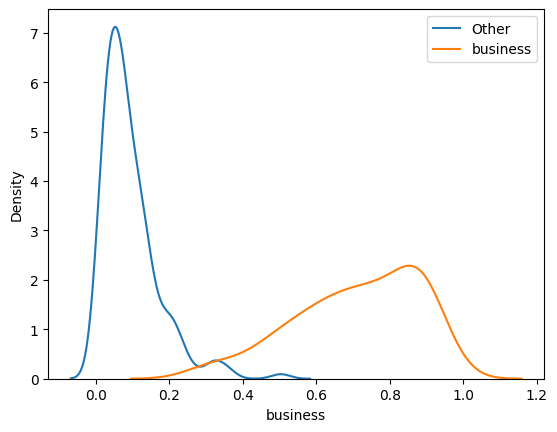

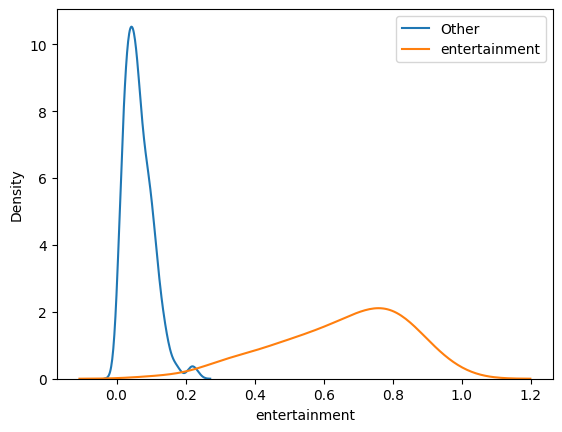

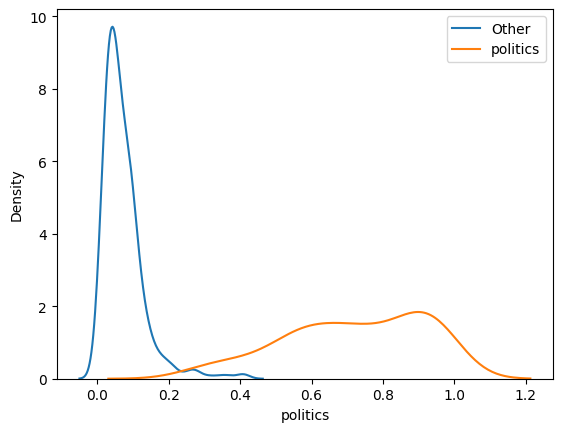

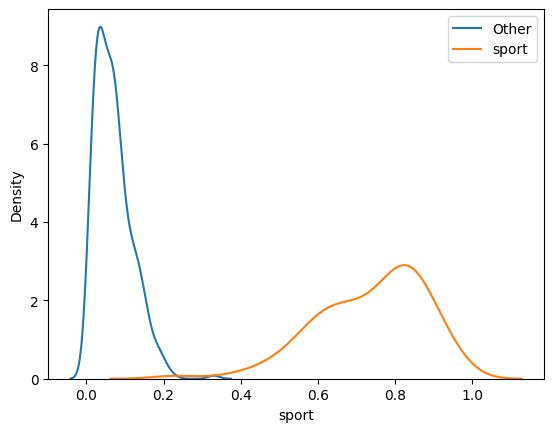

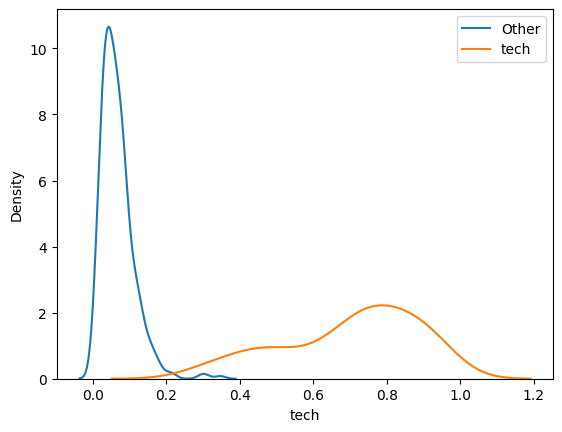

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
for class_name in preds_df.columns:
  sns.kdeplot(preds_df.loc[(y_test!=class_name).values, class_name],  label="Other")
  sns.kdeplot(preds_df.loc[(y_test==class_name).values, class_name],  label=class_name)
  plt.legend()
  plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, columns=['Pred_'+i for i in model.classes_], index=['True_'+i for i in model.classes_])
cm

,Pred_business,Pred_entertainment,Pred_politics,Pred_sport,Pred_tech
True_business,101,0,1,0,1
True_entertainment,0,81,3,0,0
True_politics,2,0,78,0,0
True_sport,1,0,0,97,0
True_tech,3,0,0,0,77
